<a href="https://colab.research.google.com/github/Sivani-2/Machine-Learning-Project/blob/main/ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**: Classify whether a banknote is authentic or forged(fake) based on its physical characteristics.


**Dataset Source**: Kaggle


**Features**: Wavelet transformed image features: variance, skewness, kurtosis, and entropy.


**Target**: Class (binary classification: 0 for fake, 1 for authentic).


**Class Balance**: The dataset is well balanced with 762 authentic and 610 fake samples.


In [ ]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Import the dataset
data=pd.read_csv('/content/BankNoteAuthentication.csv')

Data Visualization (Visualize the data to understand more clearly about the patterns)

In [ ]:
data.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [ ]:
target_names = data.iloc[:, -1].unique()
print(target_names)

[0 1]


In [ ]:
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


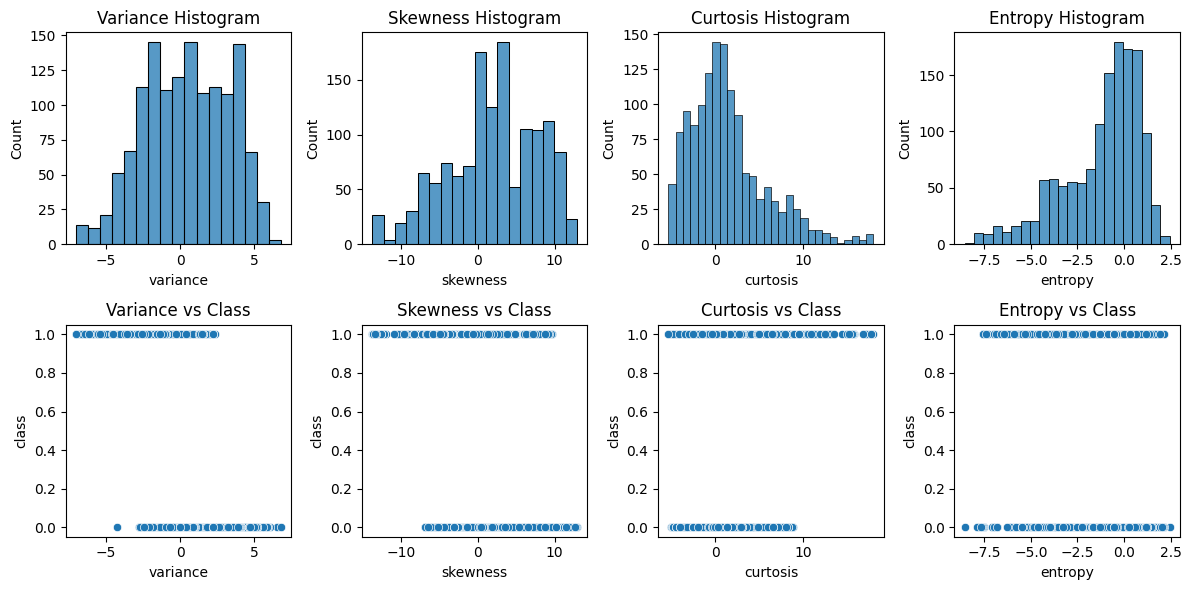

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Create subplots for each visualization
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Histogram of variance
sns.histplot(data['variance'], ax=axes[0, 0])
axes[0, 0].set_title('Variance Histogram')

# Histogram of skewness
sns.histplot(data['skewness'], ax=axes[0, 1])
axes[0, 1].set_title('Skewness Histogram')

# Histogram of curtosis
sns.histplot(data['curtosis'], ax=axes[0, 2])
axes[0, 2].set_title('Curtosis Histogram')

# Histogram of entropy
sns.histplot(data['entropy'], ax=axes[0, 3])
axes[0, 3].set_title('Entropy Histogram')

# Scatter plot of variance vs class
sns.scatterplot(x='variance', y='class', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Variance vs Class')

# Scatter plot of skewness vs class
sns.scatterplot(x='skewness', y='class', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Skewness vs Class')

# Scatter plot of curtosis vs class
sns.scatterplot(x='curtosis', y='class', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Curtosis vs Class')

# Scatter plot of entropy vs class
sns.scatterplot(x='entropy', y='class', data=data, ax=axes[1, 3])
axes[1, 3].set_title('Entropy vs Class')

plt.tight_layout()
plt.show()

In [ ]:
# Splitting the dataset for proper visualization
data0 = data[:50]
data1 = data[50:100]

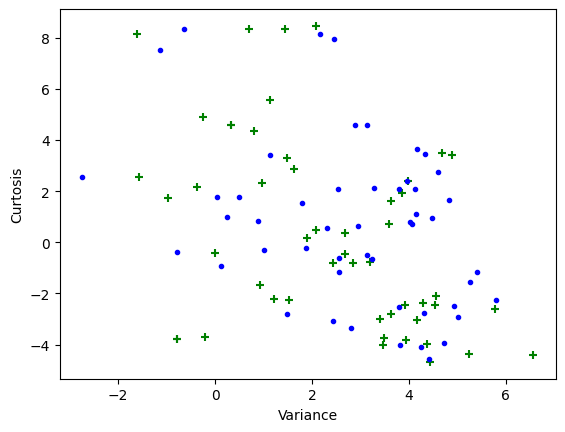

In [ ]:
plt.xlabel('Variance')
plt.ylabel('Curtosis')
plt.scatter(data0['variance'], data0['curtosis'],color="green",marker='+')
plt.scatter(data1['variance'], data1['curtosis'],color="blue",marker='.')

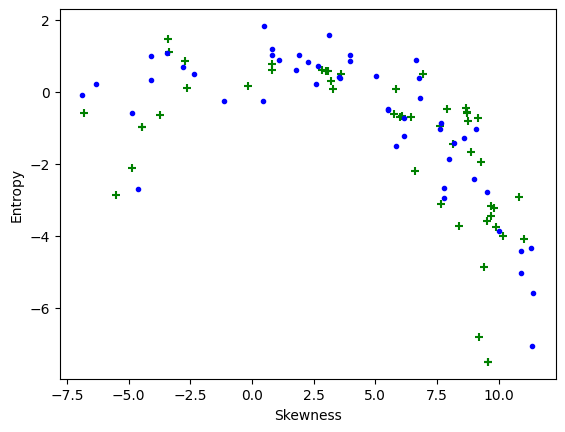

In [ ]:
plt.xlabel('Skewness')
plt.ylabel('Entropy')
plt.scatter(data0['skewness'], data0['entropy'],color="green",marker='+')
plt.scatter(data1['skewness'], data1['entropy'],color="blue",marker='.')

In [ ]:
#Data Preparation

# Select 1st 2 attributes to build the KNN model
features = data.columns[:2]

# Select features as X and target variable as y
X = data[features]
y = data.iloc[:, -1]

In [ ]:
# Splitting the dataset into training and testing data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

1097

In [ ]:
len(X_test)

275

# Implementation of KNN algorithm for BankNote Authentication Dataset


In [ ]:
#Model Building
# KNN Classifier with number of nearest neighbours = 7
k=7
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Evaluation of the model
accuracy = knn.score(X_test, y_test) #accuracy of the model
print(f"Accuracy of the KNN model:{accuracy*100:.2f}%")

Accuracy of the KNN model:92.73%


In [ ]:
print(knn.n_features_in_) #number of input features the model was trained on

2


In [ ]:
print(X_train.columns)

Index(['variance', 'skewness'], dtype='object')


In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[141,   7],
       [ 13, 114]])

Text(58.222222222222214, 0.5, 'Truth')

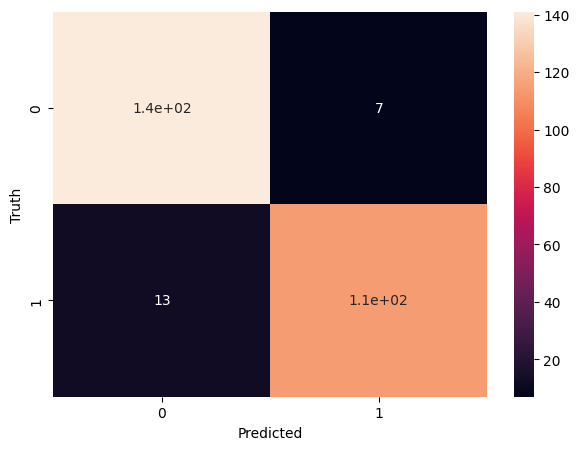

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       148
           1       0.94      0.90      0.92       127

    accuracy                           0.93       275
   macro avg       0.93      0.93      0.93       275
weighted avg       0.93      0.93      0.93       275



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-22-feb4ad2cd3a2>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cmap_bold,


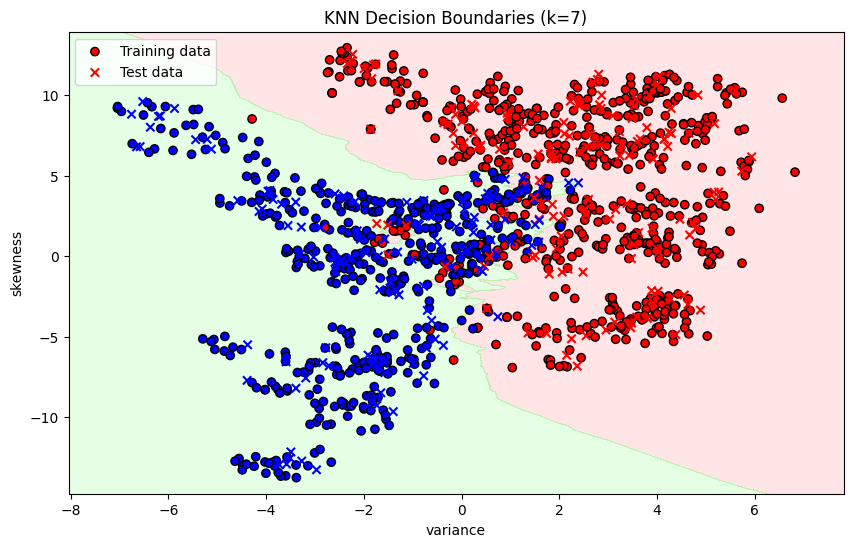

In [ ]:
# Plotting
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map
cmap_light = ListedColormap(['pink', 'light green'])
cmap_bold = ListedColormap(['red', 'dark blue'])

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Plot training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', marker='o', label='Training data')

# Plot testing points
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', marker='x', label='Test data')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title(f'KNN Decision Boundaries (k={k})')
plt.legend()
plt.show()

# Implementation of SVM for BankNote Authentication Dataset



In [ ]:
#X=data.iloc[:,[2,3]].values
#y=data.iloc[:,4].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')
classifier.fit(X_train,y_train)

SVC()

In [ ]:
y_Pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_Pred)
acc=accuracy_score(y_test,y_Pred)
error_rate = 1 - (cm.diagonal().sum() / cm.sum())
print("Accuracy ","{:.2%}".format(acc))
print("Error Rate:",error_rate)

Accuracy  92.42%
Error Rate: 0.07580174927113703


In [ ]:
cm=confusion_matrix(y_test,y_Pred)
cm

array([[180,  11],
       [ 15, 137]])

In [ ]:
# Custom kernel for better accuracy
from sklearn.metrics.pairwise import rbf_kernel

def custom_kernel(X, Y):
  """
  A custom kernel function that combines RBF kernel with polynomial kernel.
  You can customize this further to fit your specific needs.

  Args:
    X: Input data matrix.
    Y: Input data matrix.

  Returns:
    The kernel matrix.
  """
  rbf_component = rbf_kernel(X, Y, gamma=4)
  polynomial_component = (X @ Y.T + 1)**2  # Polynomial kernel with degree 2
  return rbf_component + polynomial_component


classifier_custom = SVC(kernel=custom_kernel)
classifier_custom.fit(X_train, y_train)

# Evaluate and compare the performance of the model with the custom kernel.
# You can use the same evaluation metrics as before.
y_pred_custom = classifier_custom.predict(X_test)
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       191
           1       0.92      0.93      0.93       152

    accuracy                           0.94       343
   macro avg       0.93      0.94      0.94       343
weighted avg       0.94      0.94      0.94       343



Text(58.222222222222214, 0.5, 'Truth')

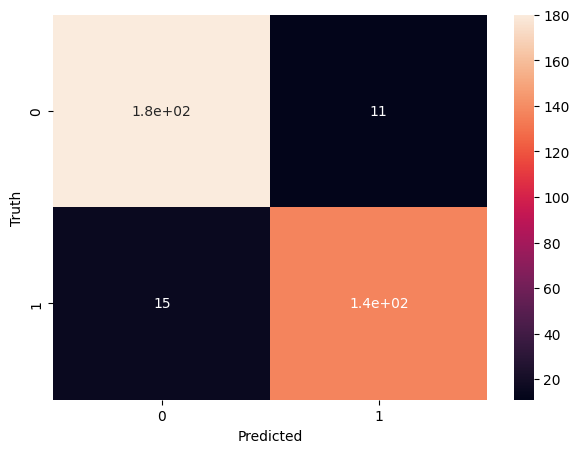

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       191
           1       0.93      0.90      0.91       152

    accuracy                           0.92       343
   macro avg       0.92      0.92      0.92       343
weighted avg       0.92      0.92      0.92       343



In [ ]:
def plot_classification(X_train, X_test, y_train, y_test, feature1_name, feature2_name):
  # Training Set Visualization
  X1, X2 = np.meshgrid(np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01),
                       np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha=0.75, cmap=ListedColormap(('red', 'green')))  # Red: Fake, Green: Genuine

  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_train)):
      plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                  c=ListedColormap(('red', 'green'))(i), label=j)

  plt.title('SVM Classification - Banknote Authentication (Training Set)')
  plt.xlabel(feature1_name)
  plt.ylabel(feature2_name)
  plt.legend()
  plt.show()

  # Test Set Visualization (similar to training set)
  X1, X2 = np.meshgrid(np.arange(start=X_test[:, 0].min() - 1, stop=X_test[:, 0].max() + 1, step=0.01),
                       np.arange(start=X_test[:, 1].min() - 1, stop=X_test[:, 1].max() + 1, step=0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha=0.75, cmap=ListedColormap(('red', 'green')))

  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_test)):
      plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],
                  c=ListedColormap(('red', 'green'))(i), label=j)

  plt.title('SVM Classification - Banknote Authentication (Test Set)')
  plt.xlabel(feature1_name)
  plt.ylabel(feature2_name)
  plt.legend()
  plt.show()

<ipython-input-33-4e5a1d84b8d1>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],


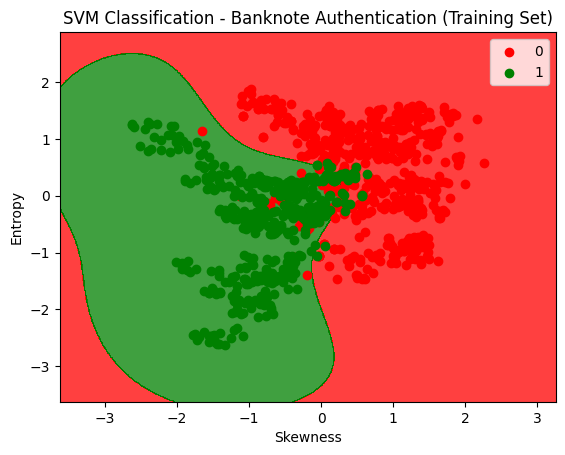

<ipython-input-33-4e5a1d84b8d1>:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],


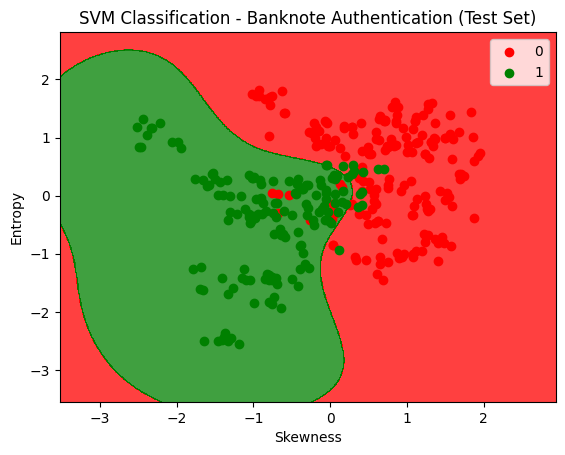

In [ ]:
# Call the function with your desired feature names
plot_classification(X_train, X_test, y_train, y_test, 'Skewness', 'Entropy')

# Implementation of ANN for BankNote Authentication Dataset



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Separate features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create the ANN model
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dense(units=6, activation='relu'))  # Hidden layer
model.add(Dense(units=1, activation='sigmoid'))  # Output layer

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2,batch_size=32)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4572 - loss: 0.6771 - val_accuracy: 0.5364 - val_loss: 0.6524
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5455 - loss: 0.6566 - val_accuracy: 0.6773 - val_loss: 0.6337
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6518 - loss: 0.6430 - val_accuracy: 0.7318 - val_loss: 0.6143
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7041 - loss: 0.6156 - val_accuracy: 0.7864 - val_loss: 0.5930
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7672 - loss: 0.5961 - val_accuracy: 0.8045 - val_loss: 0.5678
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7928 - loss: 0.5792 - val_accuracy: 0.8409 - val_loss: 0.5421
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8001 - loss: 0.5646 - val_accuracy: 0.8727 - val_loss: 0.5144
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8279 - loss: 0.5333 - val_accuracy: 0.8955 - val_loss:

In [ ]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0656 
Test Accuracy: 0.99


In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


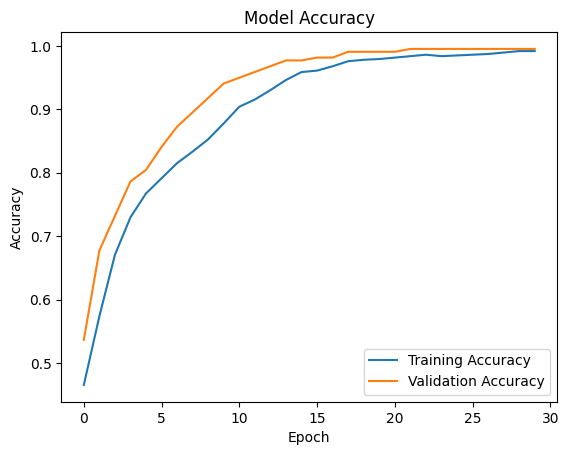

In [ ]:
# Plot training and validation accuracy (using history from training)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

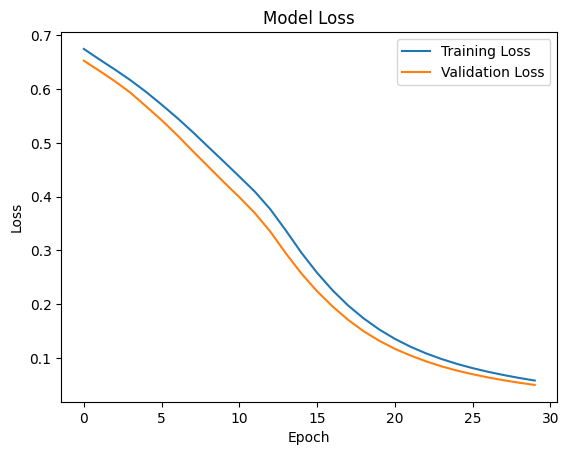

In [ ]:
# Plot training and validation loss (using history from training)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


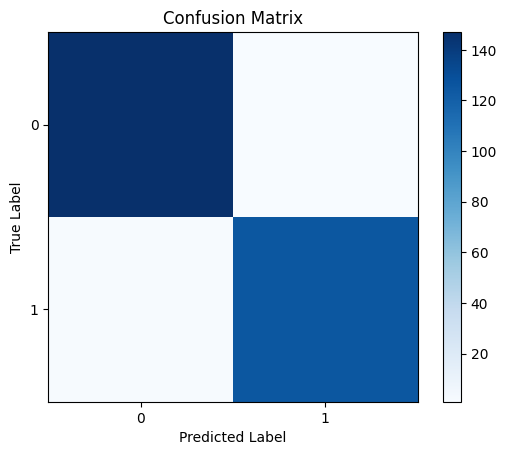

In [ ]:
# Plot confusion matrix
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.show()

In [ ]:
# Function to predict the class for a new data point
def predict_class(new_data):
    new_data = scaler.transform(new_data.reshape(1, -1))  # Standardize and reshape
    predicted_proba = model.predict(new_data)
    predicted_class_index = np.argmax(predicted_proba)
    if predicted_class_index == 1:
        return "Predicted class: Authentic"
    elif predicted_class_index == 0:
        return "Predicted class: Fake"
    else:
        return "Unexpected number of classes!"

new_data_example = np.array([[-8.0, -15.0, -6.0, -9.0]])
prediction = predict_class(new_data_example)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: Fake


**Result:**Using KNN, SVM and ANN, banknote is predicted as fake or real. A comparative analysis is done for the models built.

**Conclusion:** Artificial Neural Networks (ANN) is the suitable model for the banknote_authentication dataset because it gives 99% accurate predictions.